## Outlier and Anomaly Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
df_clean = df.drop(['Time', 'Amount', 'Class'], axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

In [18]:
scaled_df = pd.DataFrame(scaled_data, columns=df_clean.columns)

## 1. Z-Score Method

In [19]:
z_scores = np.abs(stats.zscore(scaled_df['V1']))
outliers_z = np.where(z_scores > 3)
print("Z-Score Outliers:", outliers_z)

Z-Score Outliers: (array([  164,   290,  1158,  1632,  2178,  2464,  2682,  2792,  2957,
        2963,  3509,  3554,  4235,  4608,  4810,  5296,  5371,  5425,
        5526,  5534,  5535,  5715,  5797,  5888,  6223,  6467,  6501,
        6624,  6727,  6783,  6812,  6905,  6958,  6969,  7080,  7081,
        7090,  7104,  7144,  7178,  7246,  7255,  7277,  7348,  7420,
        7485,  7522,  7523,  7560,  7578,  7580,  7616,  7617,  7743,
        7744,  8447,  8487,  8488,  8572,  8610,  8683,  8820,  8855,
        8973,  9106,  9119,  9545,  9895, 10115, 10131, 10460, 10483,
       10515, 10535, 10567, 10573, 10582, 10584, 10607, 10690, 10801,
       10804, 10891, 10897, 10900, 10913, 11033, 11222, 11300, 11343,
       11364, 11465, 11681, 11710, 11841, 11842, 11880, 11891, 11956,
       12021, 12034, 12070, 12103, 12108, 12117, 12139, 12156, 12184,
       12225, 12229, 12234, 12237, 12240, 12255, 12258, 12261, 12270,
       12271, 12284, 12325, 12328, 12369, 12386, 12402, 12468, 12477,
 

<Axes: >

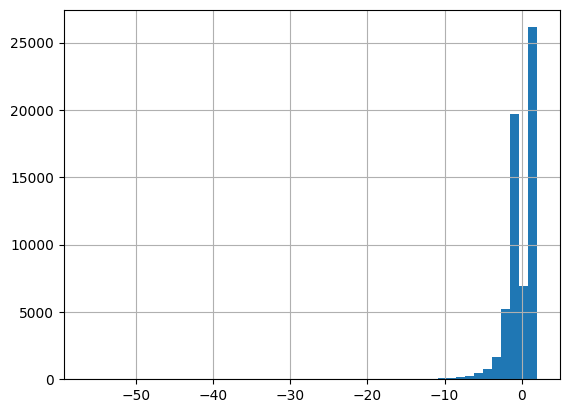

In [21]:
df['V1'].hist(bins=50)

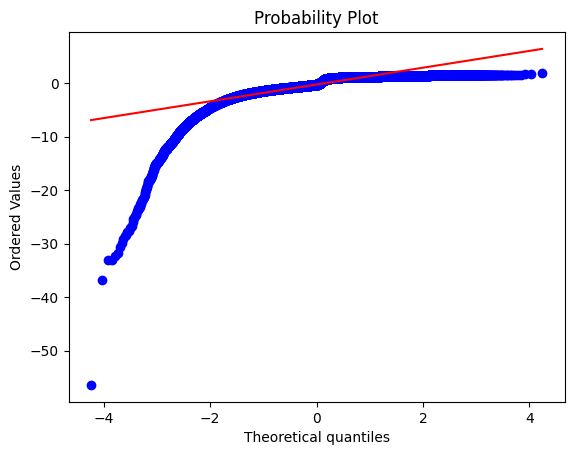

In [22]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['V1'], dist="norm", plot=plt)
plt.show()

When you're using Z-score for outlier detection, it's important (though not strictly mandatory) that the column you're analyzing is approximately normally distributed.

In [23]:
print("Total outliers found:", len(outliers_z[0]))

Total outliers found: 846


In [25]:
df_outliers = df.iloc[outliers_z[0]]
df_outliers.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164,103,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0.0
290,209,-5.852465,5.267376,-1.761895,-1.441250,-0.988529,-0.672187,0.075760,0.774198,3.580112,...,-0.910910,-1.204988,0.215766,-0.498066,1.125918,0.201450,2.468867,1.573084,8.97,0.0
1158,905,-6.169664,6.118940,-1.667775,-1.206991,-0.021373,-1.208458,2.184989,-1.512188,6.450992,...,-1.127086,0.261435,0.136166,0.413380,0.666632,-0.530568,2.464962,0.365892,0.89,0.0
1632,1264,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,0.0
2178,1698,-5.849226,-11.754975,-3.333303,3.673246,-4.459583,0.659098,4.527224,-0.985512,0.237794,...,2.160870,-1.992179,-3.240351,0.609619,-0.985548,0.089693,-0.713355,0.653060,3669.00,0.0
2464,2029,-12.168192,-15.732974,-0.376474,3.792613,10.658654,-7.465603,-6.907038,1.573722,0.058164,...,1.660209,-0.910516,0.010468,-0.097246,-0.329918,0.225916,0.201802,-2.368534,120.00,0.0
2682,2223,-7.546256,3.051033,-0.524684,1.005228,0.040486,2.751676,-6.267406,-19.176657,1.049976,...,9.639417,-3.053597,2.648404,0.429294,0.300704,-0.273082,1.300662,-0.641413,29.90,0.0
2792,2341,-10.780565,-9.940571,1.703409,3.094958,7.929119,-4.032777,-8.945496,-5.099389,2.297646,...,-4.399837,1.633000,-0.711629,0.645921,-0.549247,0.704801,3.372603,-1.307732,85.00,0.0
2957,2501,-5.948482,5.573239,-2.932061,-1.450307,-2.521964,2.641657,-10.045540,-22.746370,-1.726559,...,-11.092565,4.327552,2.009214,0.774036,-0.630253,-0.998636,-0.031049,0.518083,7.50,0.0
2963,2507,-6.200114,5.025406,-2.742492,-0.940903,-6.656259,5.432294,-9.198175,-22.588547,-3.244295,...,-11.235266,4.393846,1.943002,0.846005,-1.343379,-0.707634,-0.210219,0.066529,544.62,0.0


In [26]:
percentage = (len(outliers_z[0]) / len(df)) * 100
print(f"Outliers make up {percentage:.4f}% of the dataset.")

Outliers make up 1.3758% of the dataset.


## 2. IQR Method

In [27]:
col = 'V1'
data = df[col]

# calculating Q1, Q3, and IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# defining bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# finding outliers
outliers_iqr = df[(data < lower_bound) | (data > upper_bound)]

In [28]:
print("Total outliers found:", outliers_iqr.shape[0])
print("Outlier bounds:", lower_bound, "to", upper_bound)
outliers_iqr.head()

Total outliers found: 1626
Outlier bounds: -4.218510367970684 to 4.378668709508811


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18,14,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0.0
85,55,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0.0
139,85,-4.257597,1.649489,-1.591242,-1.374317,-1.180136,-0.331040,-0.117992,1.592032,0.415996,...,-0.452568,-0.671703,0.001422,-0.876377,0.070098,0.729582,-0.002942,-0.481497,124.67,0.0
140,87,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,...,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0.0
146,92,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0.0


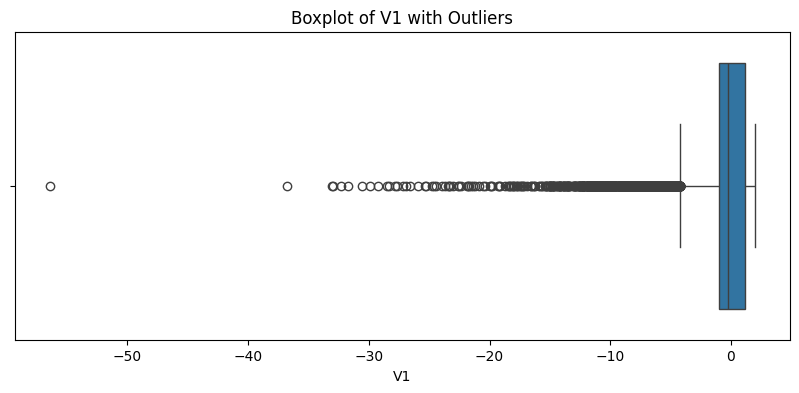

In [29]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['V1'])
plt.title('Boxplot of V1 with Outliers')
plt.show()

In [30]:
outlier_counts = {}

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

In [31]:
print("Outlier counts per column:")
for k, v in outlier_counts.items():
    print(f"{k}: {v}")

Outlier counts per column:
Time: 3423
V1: 1626
V2: 3257
V3: 2033
V4: 705
V5: 3708
V6: 5133
V7: 2124
V8: 5624
V9: 1608
V10: 2412
V11: 209
V12: 2758
V13: 547
V14: 2968
V15: 1013
V16: 1390
V17: 1721
V18: 2203
V19: 1413
V20: 6095
V21: 3911
V22: 676
V23: 4901
V24: 1089
V25: 1262
V26: 378
V27: 9008
V28: 11396
Amount: 6476
Class: 163


## 3. DBSCAN

#### Density-Based Spatial Clustering of Applications with Noise

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
df_clean = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

In [6]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

In [ ]:
# RAM crashed here because of around 40 billion calculations of distances between the points
dbscan = DBSCAN(eps=1.5, min_samples=10)
labels = dbscan.fit_predict(reduced_data)

In [7]:
# using a sample from the dataset instead
sampled_data = reduced_data[np.random.choice(reduced_data.shape[0], 10000, replace=False)]

In [8]:
# running on sampled data
dbscan = DBSCAN(eps=1.5, min_samples=10)
labels = dbscan.fit_predict(sampled_data)

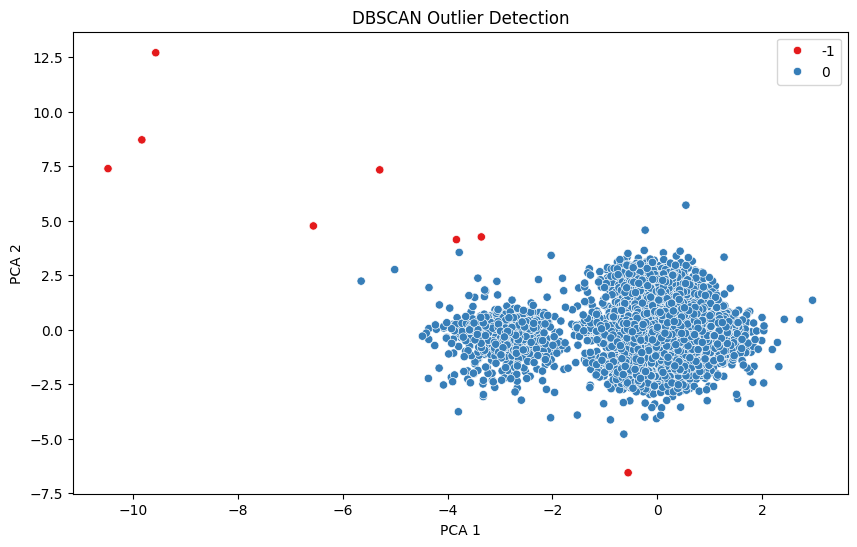

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=sampled_data[:, 0],
    y=sampled_data[:, 1],
    hue=labels,
    palette='Set1',
    legend='full'
)
plt.title("DBSCAN Outlier Detection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


**Parameters:**

eps: radius of neighborhood

min_samples: how many neighbors are needed to form a dense area

## 4. Isolation Forest

In [24]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.0001, random_state=42)
outlier_preds = iso_forest.fit_predict(scaled_data)

In [25]:
outliers = np.where(outlier_preds == -1)
print("Number of outliers detected:", len(outliers[0]))

Number of outliers detected: 29


In [26]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [27]:
viz_df = pd.DataFrame(pca_data, columns=["PCA1", "PCA2"])
viz_df["Outlier"] = outlier_preds

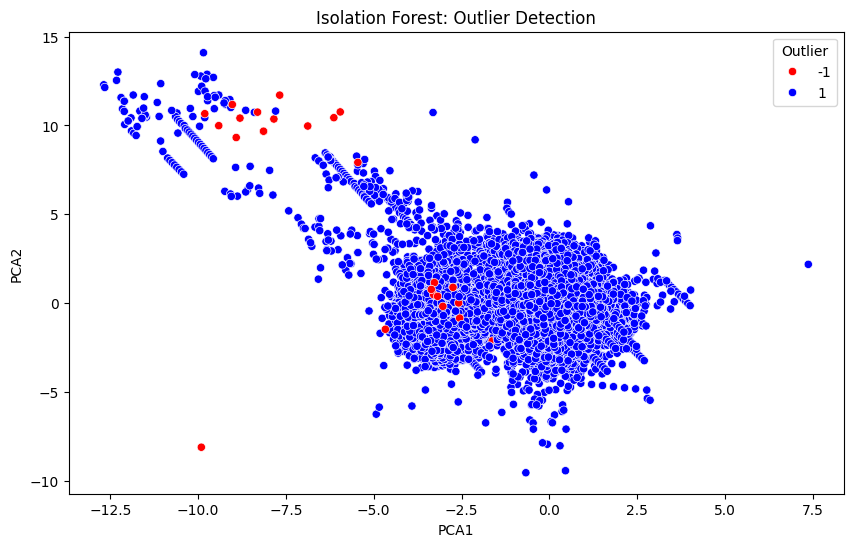

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=viz_df, x="PCA1", y="PCA2", hue="Outlier", palette={1: "blue", -1: "red"})
plt.title("Isolation Forest: Outlier Detection")
plt.show()

**contamination** tells how many outliers we expect (~10%)

Returns 1 (inlier) or -1 (outlier)

## 5. Local Outlier Factor (LOF)

In [29]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

# fit and predict
y_pred = lof.fit_predict(scaled_data)  # -1 = outlier, 1 = inlier
outliers_lof = np.where(y_pred == -1)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


In [30]:
print("LOF Outliers found:", len(outliers_lof[0]))

LOF Outliers found: 2849


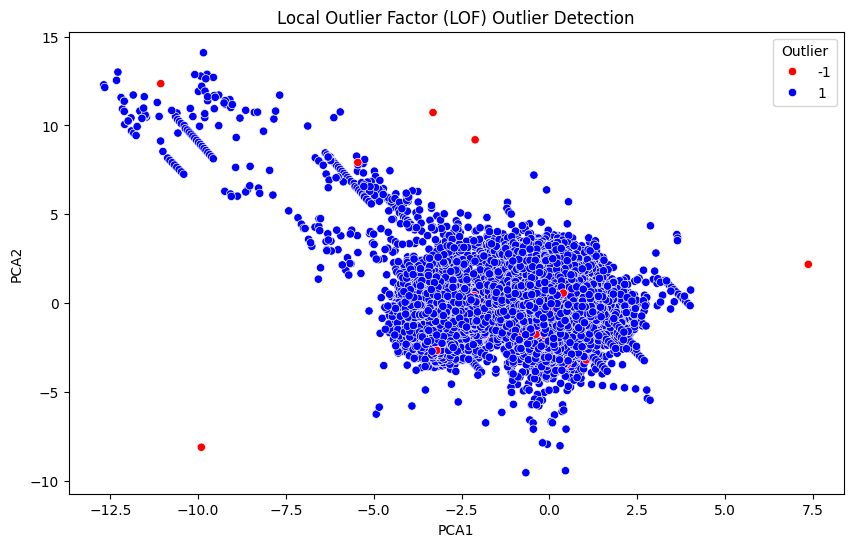

In [31]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plot_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
plot_df['Outlier'] = y_pred

# visualizing
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Outlier', palette={1: 'blue', -1: 'red'})
plt.title("Local Outlier Factor (LOF) Outlier Detection")
plt.show()

## 6. One-Class SVM

In [32]:
sampled_df = df_clean.sample(n=10000, random_state=42)
scaled_sampled = scaler.fit_transform(sampled_df)

In [33]:
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)  # nu is like contamination
y_pred_svm = oc_svm.fit_predict(scaled_sampled)

In [34]:
outliers_svm = np.where(y_pred_svm == -1)

In [35]:
print("Total outliers detected by One-Class SVM:", len(outliers_svm[0]))

Total outliers detected by One-Class SVM: 183
